<h1>
  <b>
    DEKCS: A Dynamic Clustering Protocol to Prolong Underwater Sensor Networks
  </b>
</h1>
<h5>
  <b>
    Authors :
    enechi G. Omeke , Graduate Student Member, IEEE, Michael S. Mollel, Metin Ozturk, Shuja Ansari, Lei Zhang , Senior Member, IEEE, Qammer H. Abbasi and Muhammad Ali Imran ,
  </b>
</h5>
<h6>
<b>
Abstrak
</b>
</h6>
<p>
Energy consumption is a critical issue in the
design of wireless underwater sensor networks (WUSNs).
Data transfer in the harsh underwater channel requires
higher transmission powers compared to an equivalent
terrestrial-based network to achieve the same range.
However, battery-operated underwater sensor nodes are
energy-constrained and require that they transmit with low
power to conserve power. Clustering is a technique for partitioning wireless networks into groups where a local base
station (cluster head) is only one hop away. Due to the
proximity to the cluster head, sensor nodes can lower their
transmitting power, thereby improving the network energy
efficiency. This paper describes the implementation of a new
clustering algorithm to prolong the lifetime of WUSNs. We propose a new protocol called distance- and energy-constrained
k-means clusteringscheme (DEKCS) for cluster head selection. A potential cluster head is selected based on its position in
the cluster and based on its residual battery level. We dynamically update the residual energy thresholds set for potential
cluster heads to ensure that the network fully runs out of energy before it becomes disconnected. Also, we leverage the
elbow method to dynamically select the optimal number of clusters according to the network size, thereby making the
network scalable. Our evaluations show that the proposed scheme outperforms the conventional low-energy adaptive
clustering hierarchy (LEACH) protocol by over 90% and an optimised version of LEACH based on k-means clustering
by 42%
</p>

Kelompok 3 Telekomunikasi dan Sistem Nirkabel Cerdas

NAMA dan NPM
- Annastya Bagas Dewantara (2306185574)
- Zikra Aulia Sanaz (2306185984)
- Riyani Jana Yanti (2206107823)
- Nurul Fadilah (2306185826)

Pembagian Tugas
- Annastya Bagas Dewantara (2306185574)
Propose Methde Sequential Q - Learning
Integrasi Program
Flowchart

- Zikra Aulia Sanaz (2306185984)
Metode K-Means

- Riyani Jana Yanti (2206107823)
Metode DEKCS

- Nurul Fadilah (2306185826)
Metode LEACH

Pada tugas ini menggunakan model matematika untuk menyelesaikan problem KLASIFIKASI

<h5>
   
    Pada tugas ini, kelompok kami melakukan komparasi dari 4 Teknik Berbeda, dengan 3 metode tersebut merupakan metode yang dilakukan paper dan 1 metode lainnya merupakan metode yang dilakukan oleh kelompok kami dalam mengatasi permasalahan yang belum di selesaikan pada paper tersebut.

    Komparasi yang dilakukan pada paper tersebut adalah :
    1. LEACH
    2. K-Means dengan Optimum K Elbow Method
    3. DECKS dengan Optimum K Elbow Method
    4. DECKS + Sequential Multi Agent Reinforcement Learning (Proposed)
</h5>

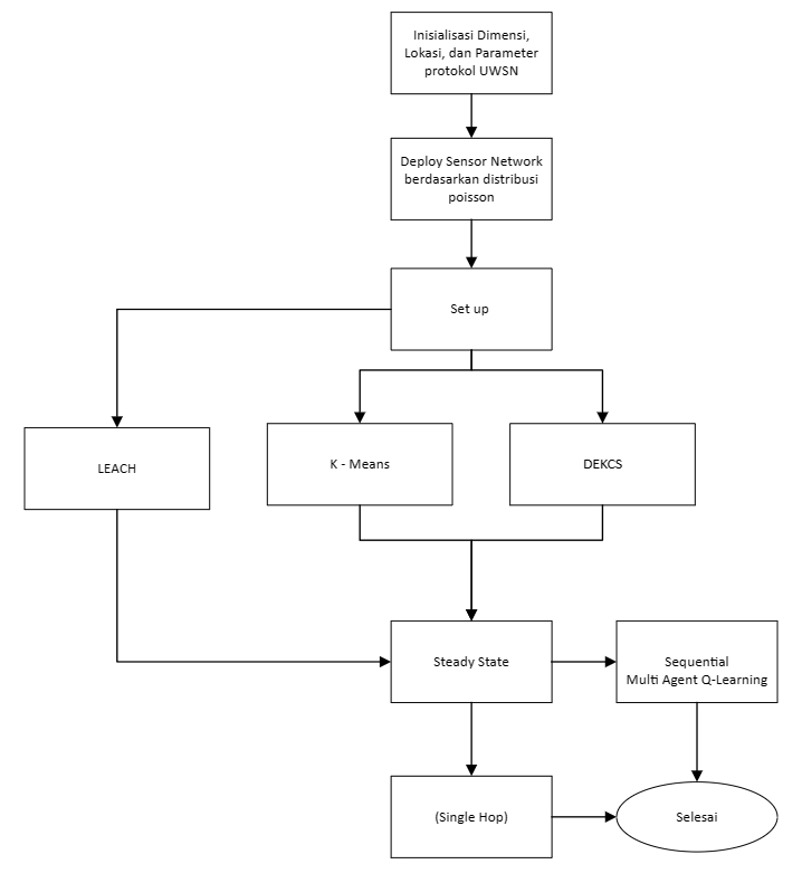

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import random
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import networkx as nx

In [2]:
P = 20
L = 20
d_max = 2
base_coor = [P/2, L/2, 0]

N = 200
m = 10
kc = 25
kd = 250
kt = kd + N
beta = 0.8
data_rate = 500 # bps
t_transmission =  ((kd * 8)/data_rate) + ((kc * 8)/data_rate) + (((kc + N) * 8)/data_rate)
initial_energy = 5
E_elec = 50 * 1e-9
E_amp =  10 * 1e-5
E_fs = 10*1e-12
E_mp = 0.0013*1e-12
p = 0.05
DECKS_threshold = 3

<h1><b>Notasi</b></h1>

$$ a : rasio $$
$$\tau_{\text{transmission}}: \text{waktu transmisi}$$
$$\tau_{\text{propagation}} : \text{waktu propagasi}$$
$$ \rho :\text{throughput}$$
$${k_c} :\text{packet}$$
$$E :\text{Energy}$$
$$d: \text {Euclidean distance}$$
$$N: \text{N sensor node}$$
$$p: \text{probabilitas LEACH}$$
$$\beta :\text{konstanta idle}$$
$${k_t}:\text{paket kontrol total}$$
$$m:\text{jumlah data frame}$$
$$P:\text{power consumption}$$
$$\lambda:\text{panjang gelombang}$$
$$T:\text{time second}$$
$$r:\text{ronde}$$
$$\mathbf{X}_i :\text{daata ke-i}$$
$$\mathbf{X}_j :\text{data ke-j}$$
$$J:\text{losss function}$$
$${\mu_j}:\text{geometric centroid
of the sensor nodes}$$
$$K :\text{jumlah cluster}$$
$$ISS :\text{intra-cluster sum of squares}$$
$${c_i}:\text {i-th cluster}$$
$${x_i}:\text {i-th node in the network}$$

<h1>
    <b>Low Energy Adaptive Cluster Head (LEACH)</b>
</h1>
<p>
    LEACH merupakan protokol dari jaringan sensor nirkabel, yang menggunakan non-persistent CSMA pada fase Setup dan TDMA pada fase Steady State Phase. Persamaan yang digunakan oleh paper [1] merupakan hasil pengembangan dari Heizelman [2], dengan persamaan dari LEACH sebagai berikut :
</p>

<h3>
    <b>- Setup Phase</b>
</h3>

Ratio
$$ a = \frac{\tau_{\text{transmission}}}{\tau_{\text{propagation}}} $$

Throughput

$$ \rho = \frac{{k_c \cdot e^{-a \cdot k_c}}}{{k_c(1 + 2a) + e^{-a \cdot k_c}}} $$

Energy yang dibutuhkan untuk proses seleksi Cluster Head

$$ E_{\text{selection}} = \frac{{k_c}}{{\rho}} \left( E_{\text{elec}} + E_{\text{amp}} \cdot d_{\text{CH−BS}}^2 \right) + \frac{{p \cdot N - 1}}{{\rho}} \left( \beta \cdot E_{\text{elec}} \cdot k_c \right) + E_{\text{elec}} \cdot k_t $$


Energy yang dibutuhkan untuk broadcasting status Cluster Head pada Node sekitarnya

$$ E_{\text{adv-CH}} = k_c \cdot \left( E_{\text{elec}} + E_{\text{amp}} \cdot d_{\text{max}}^2 \right) $$


energy yang dibutuhkan untuk bergabung ke dalam cluster

$$ E_{\text{Join}} = p \cdot N \cdot k_c \cdot E_{\text{elec}} $$


<h3>
    <b>Steady State Phase</b>
</h3>

Energy yang dibutuhkan untuk melakukan broadcasting schedule pengiriman data menggunakan TDMA

$$ k_t = k_c + N $$


$$ E_{\text{TDMA-CH}} = N_c \cdot k_c \cdot E_{\text{elec}} + k_t \cdot (E_{\text{elec}} + E_{\text{amp}} \cdot d_{\text{max}}^2) $$


$$ E_{\text{TDMA-Node}} = \frac{k_c}{\rho} \cdot (E_{\text{elec}} + E_{\text{amp}} \cdot d_{\text{Node-CH}}^2) + \frac{N - 1}{\rho} \cdot \beta \cdot E_{\text{elec}} \cdot k_c + E_{\text{elec}} \cdot k_t $$


Energy yang dibutuhkan untuk mengirimkan data dari Cluster Head ke Base Station dan dari Node ke Cluster Head


$$ E_{\text{CH-BS}} = m \cdot \left[ (N_c \cdot k_d \cdot E_{\text{elec}}) + (N - N_c) \right] \cdot (\beta \cdot E_{\text{elec}} \cdot k_d) + k_d \cdot (E_{\text{elec}} + E_{\text{amp}} \cdot d_{\text{Node-CH}}^2) $$


$$ E_{\text{Node-CH}} = m \cdot k_d \cdot \left( E_{\text{elec}} + E_{\text{amp}} \cdot d_{\text{Node-CH}}^2 \right) $$


In [3]:
def ratio_delay(D, distance):
    v = 3 * 1e8
    t = distance/v
    a = t/t_transmission
    # print(f"Ratio delay : {a:.2f} | T_tranmission : {t_transmission:.2f} | T_uw : {t_uw:.2f}")
    return a

def throughput(a):
    numerator = kc * np.exp(-a * kc)
    denominator = kc * (1 + 2 * a) + np.exp(-a * kc)
    rho = numerator / denominator
    # print(f"Throughput : {rho:.2f} | numerator : {numerator:.2f} | denominator : {denominator:.2f}")
    return rho


class Node:
    def __init__(self, x, y, z, id):
        self.x = x
        self.y = y
        self.z = z
        self.energy = initial_energy
        self.nϵG = False
        self.alive = True
        self.CH = False
        self.which_cluster = 0
        self.eligible_round = 0
        self.cluster_class = 0
        self.id = id

    def distance(self, other_node):
        return np.sqrt((self.x - other_node.x)**2 + (self.y - other_node.y)**2)

    def reset(self):
        self.CH = False
        self.which_cluster = 0

    def advertisement(self, count_cluster, eligible_round):
        self.CH = True
        self.nϵG = False
        self.eligible_round = eligible_round
        self.which_cluster = count_cluster

    def energySelection(self, d_CH_BS, p):
        # If node selected as a CH
        a = ratio_delay(self.z, d_CH_BS)
        rho = throughput(a)
        first_term = (kc / rho) * (E_elec + E_amp * (d_CH_BS**2))
        second_term = (p * (N - 1) / rho) * (beta * E_elec * kc)
        third_term = E_elec * kt
        E_Selection = first_term + second_term + third_term
        return E_Selection

    def energyAdvertisement(self):
        # Broadcasting to all nodes in the range of d_max, occurs only for CH
        return kc * (E_elec + E_amp * (d_max**2))

    def energyJoin(self, p):
        # Node receive the broadcasting message and decide whether want to join as a associated node for CH i-th
        return p * N * kc * E_elec

    def energy_contention_TDMA_CH(self, Nc):
        return kc * Nc * E_elec + kt * (E_elec + E_amp * (d_max**2))

    def energy_contention_TDMA_Node(self, d_CH_Node):
        a = ratio_delay(self.z, d_CH_Node)
        rho = throughput(a)
        energy = (kc / rho) * (E_elec + E_amp * (d_CH_Node**2)) + ((N-1)/ rho) * kc * beta * E_elec + kt * E_elec
        return energy

    def energyFrame_CH(self, Nc, d_CH_BS):
        return m * Nc * kd * E_elec * beta * kd * E_elec + kd * (E_elec +  E_amp * (d_CH_BS**2))

    def energyFrame_Node(self, d_CH_Node):
        return m * kd * E_elec * (E_elec + E_elec +  E_amp * (d_CH_Node**2))


<h3>
    <b>Wireless Sensor Network Deployment</b>
</h3>

<p>
Pada paper tersebut, penulis menjelaskan bahwa sensor tersebut terdistribusi Poisson, dengan nilai lambda di dasarkan atas densitas jumlah N sensor terhadap luas area.
</p>

$$ P(X = k) = \frac{e^{-\lambda} \lambda^k}{k!} $$


$$f(x) = \frac{1}{b - a}, \quad a \leq x \leq b $$


In [4]:
def createNetworks():
    areaTotal = P * L

    #Point process parameters
    lambda0 = N/(P * L)

    #Simulate a Poisson point process
    numbPoints = np.random.poisson(lambda0 * areaTotal)
    xx = P * np.random.uniform(0,1,numbPoints)
    yy = L * np.random.uniform(0,1,numbPoints)

    nodes = []
    nodes.append(Node(P//2, L//2, 0, 0))

    for i in range(len(xx)):
        nodes.append(
            Node(xx[i], yy[i], 0, i + 1)
        )

    return nodes

<h3>
    <b>Low energy Adaptive Cluster Hierarchy (LEACH)</b>
</h3>
<p>
    Melakukan pemilihan Cluster Head berdasarkan nilai threshold dan ratio yang ditentukan
</p>

$$ T(n) = \frac{r}{1 - r \cdot (n \mod \frac{1}{r})} $$


<h3>
    <b>K-Means Clustering</b>
</h3>
<p>
    Melakukan pemilihan Cluster Head berdasarkan jarak node yang paling dekat dengan Centroid
</p>

1. Diberikan data set sensor network dengan N sensor node :

$$ \mathbf{X}_i = \begin{bmatrix} x_i^1 & x_i^2  \end{bmatrix}^T $$

2. Loss Function  dengan Euclidian Distance

$$ J = \min_{\mu_j} \sum_{i=0}^{N-1} \sum_{j=0}^{K-1} r_{n,k} \lVert \mathbf{X}_i - \mu_j \rVert_2^2 $$


3. .Setiap titik data akan di-assign ke salah satu cluster head, dan nilai r(n,k) menunjukkan probabilitas bahwa titik data tersebut termasuk dalam cluster tertentu
$$ r_{n,k} = \begin{cases} 1, & \text{if } k = \text{argmin}_j \left( \lVert \mathbf{X}_i - \boldsymbol{\mu}_j \rVert_2^2 \right) \\ 0, & \text{Otherwise} \end{cases} $$


4. Nilai centroid terbaik adalah nilai dimana jarak antar titik terhadap centroid minimum, yang bisa dijabarkan dengan persamaan :
$$ \frac{\partial}{\partial \mu_j} \sum_{i=0}^{N-1} \sum_{j=0}^{K-1} r_{n,k} \lVert \mathbf{X}_i - \mu_j \rVert_2^2 = 0 $$


5. Mengupdate nilai Centroid
$$ \mu_j = \frac{\sum_{i=0}^{N-1} r_{n,k} \mathbf{X}_i}{\sum_{i=0}^{N-1} r_{n,k}} $$


<h3>
    <b>DEKCS: A Dynamic Clustering Protocol to
Prolong Underwater Sensor Networks</b>
</h3>


<p>
    Melakukan pemilihan Cluster Head berdasarkan jarak antar node terkecil pada satu klaster, dengan metode pemilihan dari cluster menggunakan Elbow Method. Persamaan dari Elbow Method  dengan menghitung Intra-Cluster Sum of Square (ISS) untuk kumpulan data :
</p>

$$  ISS = \sum_{i=0}^{N-1} \ \lVert \mathbf{X}_i - c_i \rVert_2^2 $$

Diberikan data set sensor network dengan N sensor node :

$$ \mathbf{X}_i = \begin{bmatrix} x_i^1 & x_i^2  \end{bmatrix}^T $$

Loss Function  dengan Euclidian Distance :
$$ J = \min_{\mu_j} \sum_{i=0}^{N-1} \sum_{j=0}^{K-1} r_{n,k} \lVert \mathbf{X}_i - \mathbf{X}_j \rVert_2^2 $$


<h3>
    <b>Metode yang digunakan: Multi Agent Reinforcement Learning + DECKS</b>
</h3>

<p>
    Menggunakan DECKS untuk pemilihan cluster head dan menggunakan RL untuk proses routing pengiriman data
</p>


Diberikan data set sensor network dengan N sensor node :
$$ \mathbf{X}_i = \begin{bmatrix} x_i^1 & x_i^2  \end{bmatrix}^T $$

Loss Function  dengan Euclidian Distance :
$$ J = \min_{\mu_j} \sum_{i=0}^{N-1} \sum_{j=0}^{K-1} r_{n,k} \lVert \mathbf{X}_i - \mu_j \rVert_2^2 $$

Reward function pada Reinforcement Learning :
$$r(s_t, a_t) = - \begin{bmatrix}
    w_{0,0} & \cdots & w_{0,N-1} \\
    \vdots & \ddots & \vdots \\
    w_{N-1,0} & \cdots & w_{N-1,N-1}
\end{bmatrix}
$$

Multi Hop based sequential multi agent Q Learning transmission

$$ Q_{(t+1)}^i(s_t, a_t) = Q_t^i(s_t, a_t) + \eta \left[ r(s_t, a_t) + \gamma \max_{a_{t}} \left\{ Q_t^i(s_{(t+1)}, a) - Q_t^i(s_t, a_t) \right\} \right] $$


In [5]:
class multiHop(object):
    def __init__(self,graph):
        self.graph = graph
        self.adjacent_mat = nx.adjacency_matrix(graph).todense()
        self.num_nodes = len(self.adjacent_mat)
        self.adjacent_mat = nx.adjacency_matrix(graph, nodelist=range(self.num_nodes)).toarray()#:D
        # print(f"\n Adjacent Matrix \n{self.adjacent_mat}\n")

    def q_learning(self,start_state=0, aim_state = 10, num_epoch=200, gamma=0.8, epsilon=0.05, alpha=0.1):

        len_of_paths = []
        rewards = self.rewardMapping(aim_state)
        # print(f"\n Reward \n{rewards}\n")


        q_table = np.zeros((self.num_nodes, self.num_nodes))  # num_states * num_actions
        td = []

        for episode in range(1, num_epoch + 1):
            #print(f"========================================================================== Episode : {episode} =========================================================================")
            current_state = start_state
            path = [current_state]
            len_of_path = 0
            while True:
                next_state = self.epsilon_greedy(current_state, q_table, start_state, epsilon=epsilon)
                s_next_next = self.epsilon_greedy(next_state, q_table, start_state, epsilon=epsilon)  # epsilon<0, greedy policy
                # update q_table
                reward = rewards[current_state][next_state]
                delta = reward + gamma * q_table[next_state, s_next_next] - q_table[current_state, next_state]

                q_table[current_state, next_state] = q_table[current_state, next_state] + alpha * delta
                # update current state
                current_state = next_state
                len_of_path += -reward
                path.append(current_state)
                # print(f"==========================\n{q_table}==========================\n")
                # print(f"reward: {reward} | Current state : {current_state} | Next state : {next_state} \n\n")

                td.append(delta)
                if current_state == aim_state:
                    break
            len_of_paths.append(len_of_path)


        # print(f"Q learning table : \n{q_table}")
        return path, td

    def epsilon_greedy(self,s_curr, q, start_state, epsilon):#exploraiton vs exploitation
        try :
            potential_next_states = np.where(np.array(self.adjacent_mat[s_curr]) > 0)[0]
        except IndexError as e:
            print(e)
            print(f"{self.adjacent_mat[s_curr]}")
        potential_next_states = potential_next_states[potential_next_states != start_state]
        # print(f"potential next state : {potential_next_states}")
        if random.random() > epsilon:
            q_of_next_states = q[s_curr][potential_next_states]
            s_next = potential_next_states[np.argmax(q_of_next_states)]
            # print(f"q_of_next_states : {q_of_next_states}   |   s_next : {s_next}")
        else:
            s_next = random.choice(potential_next_states)
        return s_next

    def rewardMapping(self, aim_state):
        r = self.adjacent_mat
        r[:, aim_state] = 10
        r[aim_state, :] = 10
        for i in range(0, len(r)):
            for j in range(0, len(r)):
                if i == j :
                    r[i][j] = -5
        return r


<h2><b>Tuning Hyper Parameter Multi Agent Q-Learning</b></h2>


<h4><b>Multi Agent Q-Learning</b></h4>
<p>
Multi Agent Q Learning digunakan untuk menciptakan rute optimum antar cluster head yang dilkakukan dengan transmisi Multi Hop untuk menciptakan load balance dan meningkatkan network lifetime, sebagai solusi dari tingginya energi transmisi pada LEACH konvensional yang masih melakukan transmisi Single-Hop antar Cluster Head dengan Base Station.

Metode yang diajukan oleh kami adalah teknik Sequential Multi Agent Q Learning. Teknik ini diawali dengan menciptakan Q-Table yang terdiri atas weight-weight hubungan antar masing-masing node dan base station yang merepresentasikan jarak euclidian serta energi residual dari masing-masing node yang membentuk adjacency matrix. Berat tersebut di normalisasi kemudian di jadikan penentuan untuk reward. Tujuan dari Sequential Multi Agent Q Learning ini adalah untuk mengirimkan data dari Cluster Head ke Base Station melalui Cluster Head lainnya, sehingga hubungan antara masing-masing Cluster Head terhadap base Station diberikan reward lebih besar dari yang lainnya. Pembentukan reward merupakan konfigurasi dari penyusunan adjacency matrix yang telah dibuat dan policy yang ditentukn.

Simulasi awal dilakukan untuk proses tuning hyperparameter dari Q-Learning, dengan mensimulasikan fase Steady State pada Jaringan. Tuning tersebut dilakukan dengan memvariasikan besar epsilon, gamma dan alpha dengan metriks temporal difference.
</p>

<h4>
<b>Epsilon (ε): </b>
</h4>
<p>
Epsilon digunakan dalam algoritma Q-learning untuk mengontrol eksplorasi versus eksploitasi. Nilai epsilon menentukan seberapa sering agen akan melakukan aksi acak (eksplorasi) daripada memilih aksi terbaik berdasarkan pengetahuannya saat ini (eksploitasi). Jika epsilon tinggi, agen akan cenderung melakukan eksplorasi lebih banyak, yang bisa membantu menemukan tindakan baru yang lebih baik. Namun, jika epsilon terlalu rendah, agen mungkin hanya melakukan eksploitasi, dan ini bisa menghambat kemampuannya untuk menemukan solusi optimal.
</p>


<h4>
<b>Gamma (γ) </b>
</h4>
<p>
Gamma mengontrol faktor diskon dalam perhitungan nilai Q. Nilai gamma menentukan seberapa penting nilai reward di masa depan dibandingkan dengan reward saat ini. Nilai gamma yang tinggi menunjukkan bahwa agen lebih memperhatikan reward di masa depan, sementara nilai yang rendah cenderung membuat agen lebih fokus pada reward sekarang.
</p>

<h4>
<b>Alpha (α): </b>
</h4>
<p>
Alpha merupakan tingkat pembelajaran dalam Q-learning, mengatur seberapa besar perubahan yang dibuat pada estimasi Q-value setiap kali agen melakukan pembaruan. Nilai alpha yang tinggi membuat agen lebih responsif terhadap pengalaman baru dan mengubah nilai-nilai Q dengan lebih cepat, namun terlalu tinggi bisa menyebabkan kegagalan dalam konvergensi karena nilai-nilai yang terlalu fluktuatif. Di sisi lain, nilai alpha yang rendah bisa membuat pembelajaran menjadi lambat, namun lebih stabil.
</p>


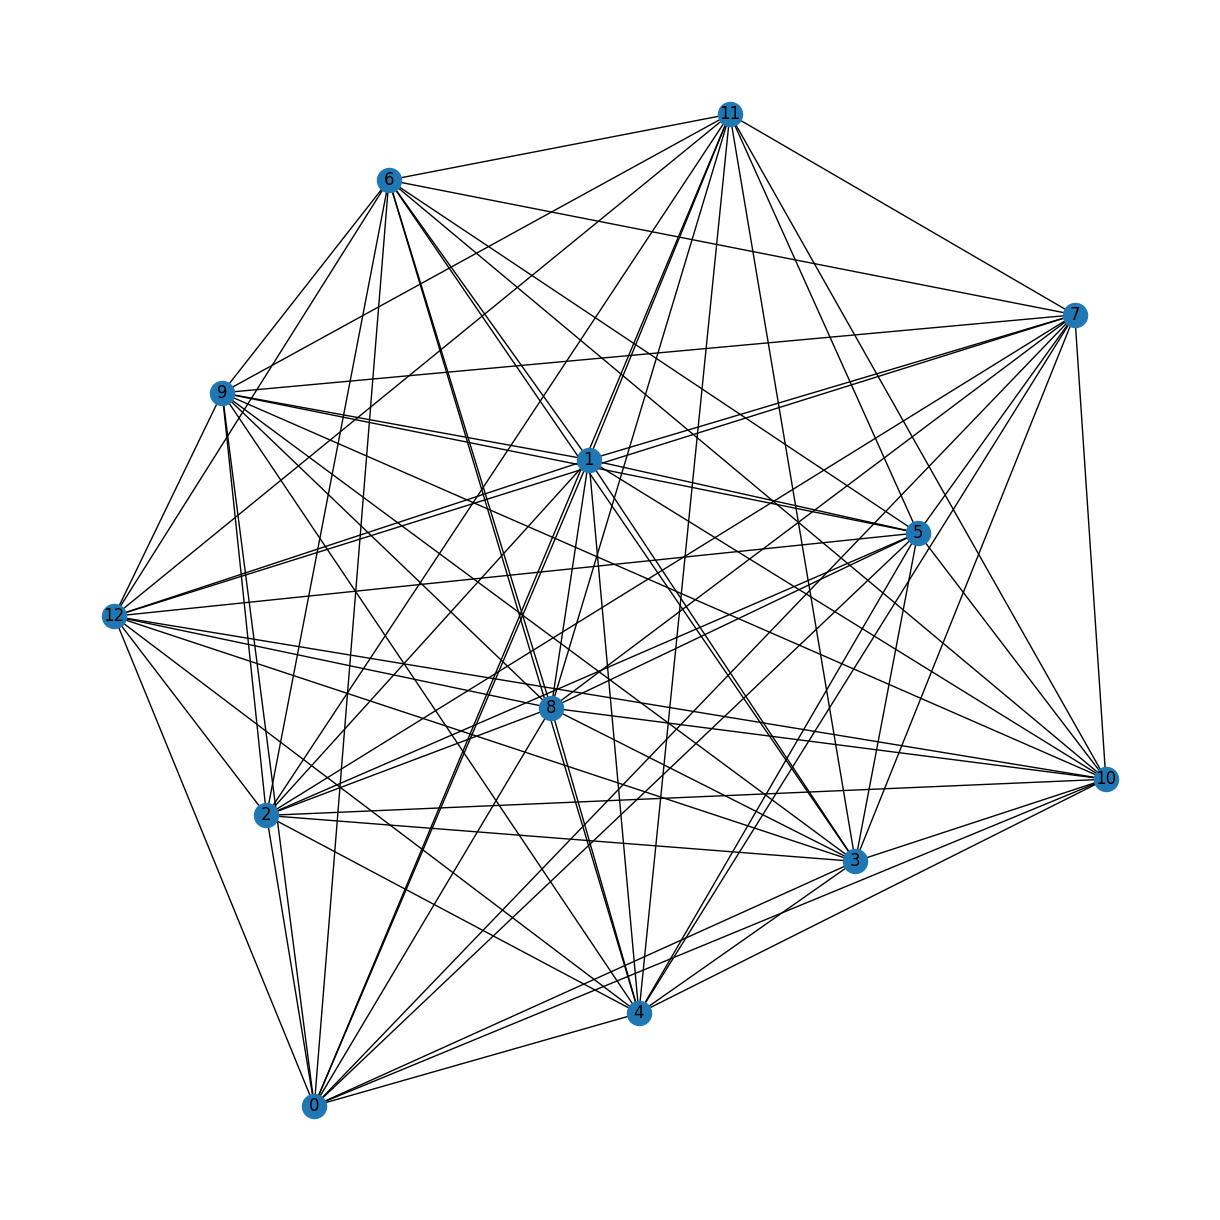

In [6]:
def createNetworks(N, P, L):
    areaTotal = P * L

    #Point process parameters
    lambda0 = N/(P * L)

    #Simulate a Poisson point process
    numbPoints = np.random.poisson(lambda0 * areaTotal)
    xx = P * np.random.uniform(0,1,numbPoints)
    yy = L * np.random.uniform(0,1,numbPoints)

    nodes = []
    nodes.append(Node(P//2, L//2, 0, 0))

    for i in range(len(xx)):
        nodes.append(
            Node(xx[i], yy[i], 0, i + 1)
        )

    return nodes

smallArchitecture = createNetworks(10, P, L)
edges = []
nodes_distance = [node1.distance(node2) for node1 in smallArchitecture for node2 in smallArchitecture if node1 != node2]
nodes_energy = [node1.energy for node1 in smallArchitecture]
avg_distances = sum(nodes_distance)/len(nodes_distance)
avg_energy = sum(nodes_energy)/len(nodes_energy)


for p1 in smallArchitecture:
    for p2 in smallArchitecture:
        if p1 != p2 :
            weight_node = (p1.distance(p2)/avg_distances)
            edges.append((p1.id, p2.id, weight_node))
G = nx.Graph()

for start, end, length in edges:
    G.add_edge(start, end, weight=length)

# Tuning Gamma
rl_gamma_80 = multiHop(G)
res, td_gamma_80 = rl_gamma_80.q_learning(start_state=0, aim_state = 2, num_epoch=1000, gamma=0.8, epsilon=0.01, alpha=0.1)

rl_gamma_50 = multiHop(G)
res, td_gamma_50 = rl_gamma_80.q_learning(start_state=0, aim_state = 2, num_epoch=1000, gamma=0.5, epsilon=0.01, alpha=0.1)

rl_gamma_20 = multiHop(G)
res, td_gamma_20 = rl_gamma_80.q_learning(start_state=0, aim_state = 2, num_epoch=1000, gamma=0.1, epsilon=0.01, alpha=0.1)

# Tuning Epsilon Greedy
rl_epsilon_8 = multiHop(G)
res, td_epsilon_8 = rl_gamma_80.q_learning(start_state=0, aim_state = 2, num_epoch=1000, gamma=0.2, epsilon=0.08, alpha=0.1)

rl_epsilon_5 = multiHop(G)
res, td_epsilon_5 = rl_gamma_80.q_learning(start_state=0, aim_state = 2, num_epoch=1000, gamma=0.2, epsilon=0.05, alpha=0.1)

rl_epsilon_2 = multiHop(G)
res, td_epsilon_2 = rl_gamma_80.q_learning(start_state=0, aim_state = 2, num_epoch=1000, gamma=0.2, epsilon=0.02, alpha=0.1)

# Tuning Alpha
rl_alpha_10 = multiHop(G)
res, td_alpha_10 = rl_gamma_80.q_learning(start_state=0, aim_state = 2, num_epoch=1000, gamma=0.2, epsilon=0.02, alpha=0.1)

rl_alpha_5 = multiHop(G)
res, td_alpha_5 = rl_gamma_80.q_learning(start_state=0, aim_state = 2, num_epoch=1000, gamma=0.2, epsilon=0.02, alpha=0.05)

rl_alpha_2 = multiHop(G)
res, td_alpha_2 = rl_gamma_80.q_learning(start_state=0, aim_state = 2, num_epoch=1000, gamma=0.2, epsilon=0.02, alpha=0.01)

plt.figure(figsize=(12,12))
nx.draw(G, with_labels=True)
plt.show()



<h4>
 <b>Hasil Tuning Parameter</b>
<h4>
<p>
<ul>
1. Melalui grafik dibawah dapat diketahui bahwa besar nilai gamma mempengaruhi
temporal difference, dan dengan mengurangi besar nilai gamma, fluktuasi temporal difference dapat berkurang dan lebih stabil dan lebih cepat konvergen
</ul>
<ul>
2. Melalui grafik dibawah dapat diketahui bahwa besar nilai epsilon mempengaruhi fluktuasi temporal difference, hal ini disebabkan karena besar epsilon mempengaruhi greedy exploitation dan exploration, dan dengan mengecilkan nilai epsilon maka fluktuasi dari training akan semakin berkurang dan lebih stabil.
</ul>

<ul>
3. Melalui grafik dibawah dapat diketahui bahwa besar nilai alpha mempengaruhi fase training dari Q Learning, hal ini ditunjukkan dari grafik tersebut bahwa nilai alpha yang besar akan lebih cepat konvergen ketimbang nilai alpha yang lebih kecil.
</ul>

</p>

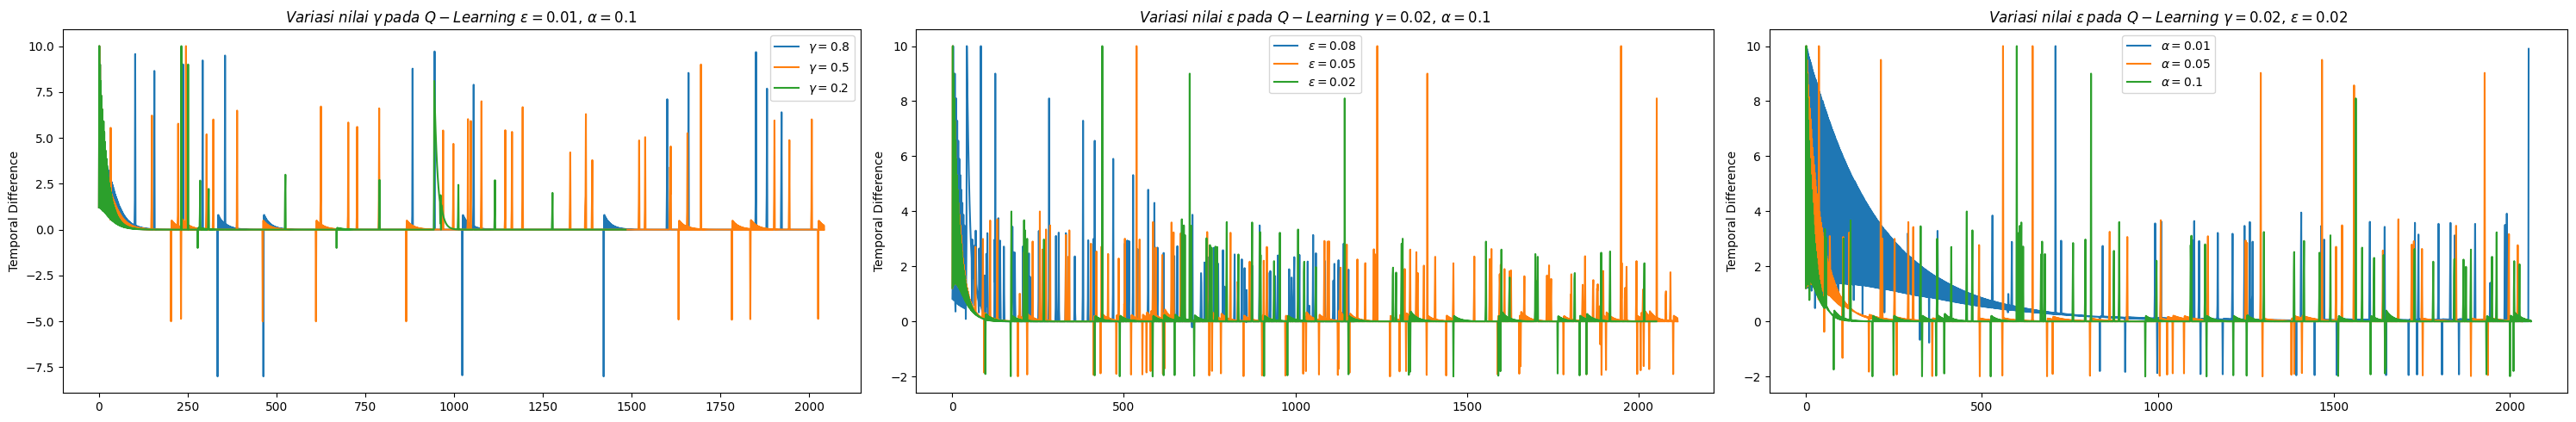

In [7]:
fig, ax = plt.subplots(1,3, figsize=(30,5))
ax[0].plot([i for i in range(len(td_gamma_80))], td_gamma_80, label=r"$γ = 0.8$")
ax[0].plot([i for i in range(len(td_gamma_50))], td_gamma_50, label=r"$γ = 0.5$")
ax[0].plot([i for i in range(len(td_gamma_20))], td_gamma_20, label=r"$γ = 0.2$")
ax[0].set_title(f"$Variasi \,\, nilai \,\, γ \, pada \,\, Q-Learning \,\, ε=0.01,\, α=0.1$")

ax[0].set_ylabel("Temporal Difference")
ax[0].legend()

ax[1].plot([i for i in range(len(td_epsilon_8))], td_epsilon_8, label=r"$ε = 0.08$")
ax[1].plot([i for i in range(len(td_epsilon_5))], td_epsilon_5, label=r"$ε = 0.05$")
ax[1].plot([i for i in range(len(td_epsilon_2))], td_epsilon_2, label=r"$ε = 0.02$")
ax[1].set_title(f"$Variasi \,\, nilai \,\, ε \, pada \,\, Q-Learning \,\, γ=0.02,\, α=0.1$")
ax[1].set_ylabel("Temporal Difference")
ax[1].legend()

ax[2].plot([i for i in range(len(td_alpha_2))], td_alpha_2, label=r"$α = 0.01$")
ax[2].plot([i for i in range(len(td_alpha_5))], td_alpha_5, label=r"$α = 0.05$")
ax[2].plot([i for i in range(len(td_alpha_10))], td_alpha_10, label=r"$α = 0.1$")
ax[2].set_title(f"$Variasi \,\, nilai \,\, ε \, pada \,\, Q-Learning \,\, γ=0.02,\, ε=0.02$")
ax[2].set_ylabel("Temporal Difference")
ax[2].legend()

plt.tight_layout()
plt.show()

In [8]:
class networkEnvironment:
    def __init__(self, nodes, mode):
        self.nodes = nodes
        self.mode = mode
        self.alive_data = []
        self.energy_data = []
        self.centroids = np.array([[P//2, L//2]])

    def showResult(self, hop):
        fig, ax = plt.subplots(1,2, figsize=(20,5))
        rounds = np.array([i for i in range(0, len(self.alive_data))])
        self.alive_data = np.array(self.alive_data)
        self.energy_data = np.array(self.energy_data)

        ax[0].plot(rounds, self.alive_data, color='k')
        ax[0].scatter(rounds[::hop], self.alive_data[::hop], marker='o', edgecolor='k', color='r')
        ax[0].set_ylabel("Node Alive")
        ax[0].set_xlabel("Round")

        ax[1].plot(rounds, self.energy_data, color='k')
        ax[1].scatter(rounds[::hop], self.energy_data[::hop], marker='o', edgecolor='k', color='r')
        ax[1].set_ylabel("Energy Consumed")
        ax[1].set_xlabel("Round")

        ax[1].yaxis.set_major_locator(MultipleLocator(np.max(self.energy_data)/5))
        ax[1].yaxis.set_major_formatter('{x:.2f}')
        ax[1].yaxis.set_minor_locator(MultipleLocator(np.max(self.energy_data)/10))
        ax[1].xaxis.set_major_locator(MultipleLocator(np.max(rounds)/10))
        ax[1].xaxis.set_major_formatter('{x:.2f}')
        ax[1].xaxis.set_minor_locator(MultipleLocator(np.max(rounds)/20))

        ax[0].yaxis.set_major_locator(MultipleLocator(np.max(self.alive_data)/5))
        ax[0].yaxis.set_major_formatter('{x:.2f}')
        ax[0].yaxis.set_minor_locator(MultipleLocator(np.max(self.alive_data)/10))
        ax[0].xaxis.set_major_locator(MultipleLocator(np.max(rounds)/10))
        ax[0].xaxis.set_major_formatter('{x:.2f}')
        ax[0].xaxis.set_minor_locator(MultipleLocator(np.max(rounds)/20))

    def showNetwork(self, simulation_round):
        fig, ax = plt.subplots()
        nodes_x = [node.x for node in self.nodes if ((node.id != 0) and (node.CH == False) and (node.which_cluster != 0) and (node.energy > 0))]
        nodes_y = [node.y for node in self.nodes if ((node.id != 0) and (node.CH == False) and (node.which_cluster != 0) and (node.energy > 0))]

        nodes_orphan_x = [node.x for node in self.nodes if ((node.id != 0) and (node.CH == False) and (node.which_cluster == 0) and (node.energy > 0))]
        nodes_orphan_y = [node.y for node in self.nodes if ((node.id != 0) and (node.CH == False) and (node.which_cluster == 0) and (node.energy > 0))]

        CH_x = [node.x for node in self.nodes if ((node.id != 0) and (node.CH == True))]
        CH_y = [node.y for node in self.nodes if ((node.id != 0) and (node.CH == True))]
        BS_x, BS_y = [node.x for node in self.nodes if node.id == 0], [node.y for node in self.nodes if node.id == 0]

        dead_nodes_x = [node.x for node in self.nodes if ((node.id != 0) and (node.energy < 0))]
        dead_nodes_y = [node.y for node in self.nodes if ((node.id != 0) and (node.energy < 0))]

        ax.scatter(nodes_x, nodes_y                       , marker="o",color='purple', edgecolors='k', label = "Node")
        ax.scatter(nodes_orphan_x, nodes_orphan_y         , marker="o",color='c', edgecolors='k', label = "Orphan Node")
        ax.scatter(CH_x, CH_y                             , marker="o",color="g", edgecolors='k', label = "Cluster Head")
        ax.scatter(dead_nodes_x, dead_nodes_y             , marker="x",color='r', label="Dead Node")
        ax.scatter(self.centroids[:,0], self.centroids[:,1], marker="o",color="y", edgecolors='k', label="Centroid")
        ax.scatter(BS_x, BS_y                             , marker="s",color="b", edgecolors='k', label="Base station")

        font = {
                'color':  'black',
                'weight': 'bold'
                }

        ax.set_title(f'Round : {simulation_round}', fontdict=font)
        ax.set_xlabel('Length (m)')
        ax.set_ylabel('Width (m)')
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
              fancybox=True, shadow=True, ncol=5, markerscale=1, fontsize=10)
        plt.tight_layout()
        plt.show()

    def is_alive_and_eligible(self, node):
        status = ((node.energy > 0) and (node.alive == True) and (node.eligible_round == 0))
        return status

    def is_lessEqual_than_threshold(self, round_number):
        if random.uniform(0, 1) <= p/(1-p * (round_number % (1/p))):
            return True
        else:
            return False

    def euclidean_distance(self, nodeA, nodeB):
        return np.sqrt(np.sum((nodeA - nodeB)**2))

    def kmeans_plusplus(self, X, k):
        centroids = []
        centroids.append(X[np.random.randint(X.shape[0])])

        for _ in range(1, k):
            distances = np.array([min([np.linalg.norm(x - c) for c in centroids]) for x in X])
            probabilities = distances / distances.sum()
            cumulative_probabilities = probabilities.cumsum()
            r = np.random.rand()
            for j, p in enumerate(cumulative_probabilities):
                if r < p:
                    i = j
                    break
            centroids.append(X[i])

        return np.array(centroids)

    def kmeans(self, X, k, iteration=100):
        # Memilih random k centroid sebagai nilai awal
        centroids = self.kmeans_plusplus(X, k)

        for i in range(iteration):
            # Euclidian Distance
            distances = np.linalg.norm(X[:, None] - centroids, axis=2)
            labels = np.argmin(distances, axis=1)
            # Mengupdate nilai Centroid
            new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
            centroids = new_centroids

        return centroids, labels

    def multiHopRouting(self, clusterHead_id):
        CHs = [node for node in self.nodes if node.id == 0] + [node for node in self.nodes if node.CH == True]
        CHsID = np.array([node.id for node in CHs])
        start_state = np.where(np.isin(CHsID, clusterHead_id))[0][0]
        print(f"Start state : {start_state}")
        edges = []
        X, Y, Z, E, id = [], [], [], [], []
        for ch in CHs:
            X.append(ch.x)
            Y.append(ch.y)
            E.append(ch.energy)
            id.append(ch.id)

        distance = np.array([X, Y]).T
        E = np.array(E).T

        G = nx.Graph()
        for i in range(0, self.k+1):
            for j in range(0, self.k+1):
                if i != j:
                    distance_normalized = self.euclidean_distance(distance[i, :], distance[j, :])/np.mean(distance)
                    energy_normalized = E[j]/np.mean(E)
                    weight = 1/distance_normalized + energy_normalized

                    edges.append((i,j, weight))
        for start, end, length in edges:
            G.add_edge(start, end, weight=length)

        map = multiHop(G)
        paths, _ = map.q_learning(start_state=start_state, aim_state = 0, num_epoch=10000, gamma=0.2, epsilon=0.02, alpha=0.1)#start_state=0,aim_state = 10
        ID_path = []

        for path in paths:
            ID_path.append(CHsID[path])
        
        return ID_path
    def CHselection(self, simulation_round):
        # Memilih Cluster Head
        print(f"====================================== Round : {simulation_round} ======================================")
        for node in self.nodes:
            node.reset()

        if self.mode == "LEACH":
            for node in self.nodes:
                if ((self.is_lessEqual_than_threshold(simulation_round)) and (self.is_alive_and_eligible(node)) and (node.id != 0)):
                    node.CH = True
                    node.which_cluster = node.id
                    node.eligible_round = 1/p

        elif self.mode == "K-Means":
            X, id = [], []
            for node in self.nodes:
                if ((node.id != 0) and (node.alive) and (node.energy > 0)) :
                    X.append([node.x, node.y])
                    id.append(node.id)

            X = np.array(X)
            elbow = []
            max_k = 10  # Maximum number of clusters to try
            for k in range(1, max_k + 1):
                centroids, labels = self.kmeans(X, k)
                error = np.sum((X - centroids[labels])**2)
                elbow.append(error)

            # Calculate the change in distortions and find the elbow point
            elbow = np.array(elbow)
            elbow_diff = np.diff(elbow, prepend=elbow[0])
            acceleration = np.diff(elbow_diff, prepend=elbow_diff[0])
            optimal_k = np.argmax(acceleration)
            self.centroids, labels = self.kmeans(X, optimal_k)
            print(f"K-opt : {optimal_k}")
            ch_id = []
            for ch in self.centroids:
                distances = [[], []]
                for node in self.nodes:
                    if node.id != 0:
                        X = np.array([node.x, node.y])
                        CH = np.array([ch[0], ch[1]])
                        distances[0].append(self.euclidean_distance(X, CH))
                        distances[1].append(node.id)

                ch_id.append(distances[1][np.argmin(distances[0])])

            for node in self.nodes:
                if node.id != 0:
                    for id in ch_id:
                        if node.id == id:
                            node.CH = True
                            node.which_cluster = id

        elif self.mode == "DECKS":
            X, id = [], []
            for node in self.nodes:
                if ((node.id != 0) and (node.alive) and (node.energy > 0)) :
                    X.append([node.x, node.y])
                    id.append(node.id)

            X = np.array(X)
            elbow = []
            max_k = 10  # Maximum number of clusters to try
            for k in range(1, max_k + 1):
                centroids, labels = self.kmeans(X, k)
                error = np.sum((X - centroids[labels])**2)
                elbow.append(error)

            # Calculate the change in distortions and find the elbow point
            elbow = np.array(elbow)
            elbow_diff = np.diff(elbow, prepend=elbow[0])
            acceleration = np.diff(elbow_diff, prepend=elbow_diff[0])
            optimal_k = np.argmax(acceleration)
            self.centroids, labels = self.kmeans(X, optimal_k)


            labels = np.array(labels)
            number_of_clusters = np.unique(labels)

            for cluster in number_of_clusters:
                count = 0
                within_cluster = []
                for label in labels:
                    if label == cluster:
                        within_cluster.append(self.nodes[count])
                    count += 1

                nearest_distance = []
                for node_i in within_cluster:
                    sum_euclidian = 0
                    for node_j in within_cluster:
                        if ((node_i != node_j) and (node_i.energy > DECKS_threshold) and (node_j.energy > 0)):
                            sum_euclidian += self.euclidean_distance(np.array([node_i.x, node_i.y]), np.array([node_j.x, node_j.y]))
                    nearest_distance.append(sum_euclidian)

                nearest_distance = np.array(nearest_distance)
                CH_id = within_cluster[np.argmin(nearest_distance)]
                for node in self.nodes:
                  if node.id == CH_id.id :
                      node.CH = True
                      node.which_cluster = node.id

        elif self.mode == "Q-Learning":
            X, id = [], []
            for node in self.nodes:
                if ((node.id != 0) and (node.alive) and (node.energy > 0)) :
                    X.append([node.x, node.y])
                    id.append(node.id)

            X = np.array(X)
            elbow = []
            max_k = 10  # Maximum number of clusters to try
            for k in range(1, max_k + 1):
                centroids, labels = self.kmeans(X, k)
                error = np.sum((X - centroids[labels])**2)
                elbow.append(error)

            # Calculate the change in distortions and find the elbow point
            elbow = np.array(elbow)
            elbow_diff = np.diff(elbow, prepend=elbow[0])
            acceleration = np.diff(elbow_diff, prepend=elbow_diff[0])
            optimal_k = np.argmax(acceleration)
            self.centroids, labels = self.kmeans(X, optimal_k)


            labels = np.array(labels)
            number_of_clusters = np.unique(labels)

            for cluster in number_of_clusters:
                count = 0
                within_cluster = []
                for label in labels:
                    if label == cluster:
                        within_cluster.append(self.nodes[count])
                    count += 1

                nearest_distance = []
                for node_i in within_cluster:
                    sum_euclidian = 0
                    for node_j in within_cluster:
                        if ((node_i != node_j) and (node_i.energy > DECKS_threshold + 0.5) and (node_j.energy > 0)):
                            sum_euclidian += self.euclidean_distance(np.array([node_i.x, node_i.y]), np.array([node_j.x, node_j.y]))
                    nearest_distance.append(sum_euclidian)

                nearest_distance = np.array(nearest_distance)
                CH_id = within_cluster[np.argmin(nearest_distance)]
                for node in self.nodes:
                  if node.id == CH_id.id :
                      node.CH = True
                      node.which_cluster = node.id

        # Node Bergabung ke Cluster Head
        CHs = [node for node in self.nodes if node.CH]
        count = 0
        if len(CHs) != 0:
            for node in self.nodes:
                if node.id != 0:
                    distances = [[], []]
                    for ch in CHs:
                        X = np.array([node.x, node.y])
                        CH = np.array([ch.x, ch.y])
                        distances[0].append(self.euclidean_distance(X, CH))
                        distances[1].append(ch.which_cluster)
                    node.which_cluster = distances[1][np.argmin(distances[0])]
        else:
            # Jika tidak ada yang terpilih sebagai CH, maka node akan diam
            for node in self.nodes:
                if node.id != 0:
                    node.which_cluster = 0

        print(f"Idle Node : {count}")
        return len(CHs)

    def Nc(self, which_cluster):
        count = 0
        for node in self.nodes:
            if node.which_cluster == which_cluster:
                count += 1
        return count

    def SetupPhase(self, simulation_round):
        self.k = self.CHselection(simulation_round)
        energy_total = sum([node.energy for node in self.nodes])
        print(f"Setup phase energy initial : {energy_total}")
        if self.k != 0:
            for node in self.nodes:
                if node.id != 0:
                    if node.CH:
                        d_CH_BS = self.euclidean_distance(np.array([node.x, node.y, node.z]), np.array(base_coor))
                        energy_dissipated = node.energyAdvertisement() + node.energySelection(d_CH_BS, self.k/N)
                        node.energy = node.energy - energy_dissipated
                    else:
                        node.energy = node.energy - node.energyJoin(self.k/N)
        else:
            print(f"There is no transmission in {simulation_round} round")

        energy_total = sum([node.energy for node in self.nodes])
        print(f"Setup phase energy after : {energy_total}")


    def SteadyStatePhase(self):
        BS = [node for node in self.nodes if node.id == 0][0]
        CHs = [node for node in self.nodes if node.CH]

        if len(CHs) != 0:
            energy_total = sum([node.energy for node in self.nodes])
            print(f"Contention phase energy initial : {energy_total:.2f}")
            for node in self.nodes:
                if node.id != 0 :
                    if node.CH == True:
                        Nc = self.Nc(node.which_cluster)
                        node.energy = node.energy - node.energy_contention_TDMA_CH(Nc)
                    else:
                        for CH in CHs:
                            if node.which_cluster == CH.which_cluster :
                                d_CH_Node = self.euclidean_distance(np.array([node.x, node.y, node.z]), np.array([CH.x, CH.y, CH.z]))
                                node.energy = node.energy - node.energy_contention_TDMA_Node(d_CH_Node)
            energy_total = sum([node.energy for node in self.nodes])

            print(f"Transmission energy begin : {energy_total:.2f}")
            if self.mode != "Q-Learning":
                for node in self.nodes:
                    if node.id != 0 :
                        if node.CH == True:
                            Nc = self.Nc(node.which_cluster)
                            d_CH_BS = self.euclidean_distance(np.array([node.x, node.y]), np.array([BS.x, BS.y]))
                            node.energy = node.energy - node.energyFrame_CH(Nc, d_CH_BS)
                        else:
                            for CH in CHs:
                                if node.which_cluster == CH.which_cluster :
                                    d_CH_Node = self.euclidean_distance(np.array([node.x, node.y]), np.array([CH.x, CH.y]))
                                    node.energy = node.energy - node.energyFrame_Node(d_CH_Node)
            else:
                for node in self.nodes:
                      if node.id != 0 :
                          if node.CH == True:
                              Nc = self.Nc(node.which_cluster)
                              d_CH_BS = self.euclidean_distance(np.array([node.x, node.y]), np.array([BS.x, BS.y]))
                              node.energy = node.energy - node.energyFrame_CH(Nc, d_CH_BS)
                              path = self.multiHopRouting(node.id)
                          else:
                              for CH in CHs:
                                  if node.which_cluster == CH.which_cluster :
                                      d_CH_Node = self.euclidean_distance(np.array([node.x, node.y]), np.array([CH.x, CH.y]))
                                      node.energy = node.energy - node.energyFrame_Node(d_CH_Node)

        for node in self.nodes:
            node.eligible_round -= 1
            if node.eligible_round < 0:
                node.eligible_round = 0
            if node.energy < 0:
                node.alive = False

        energy_total = sum([node.energy for node in self.nodes])
        node_alive = len([node.energy for node in self.nodes if node.alive])
        print(f"Node Alive : {node_alive} | CH : {len(CHs)}")

        self.alive_data.append(node_alive)
        self.energy_data.append(energy_total)

    def startSimulation(self, rounds):
        #self.showNetwork(0)
        for simulation_round in range(1, rounds):
            self.SetupPhase(simulation_round)
            self.SteadyStatePhase()
            # if simulation_round % 10 == 0:
            #     self.showNetwork(simulation_round)
        self.showResult(10)

        return self.alive_data, self.energy_data


node_LEACH    = createNetworks(N, P, L)
node_K_Means  = createNetworks(N, P, L)
node_DECKS    = createNetworks(N, P, L)
node_proposed = createNetworks(N, P, L)

====================================== Round : 1 ======================================
Idle Node : 0
Setup phase energy initial : 960
Setup phase energy after : 957.9948867092222
Contention phase energy initial : 957.99
Transmission energy begin : 949.19
Node Alive : 192 | CH : 13
====================================== Round : 2 ======================================
Idle Node : 0
Setup phase energy initial : 931.1920463515477
Setup phase energy after : 928.8928922682117
Contention phase energy initial : 928.89
Transmission energy begin : 918.97
Node Alive : 192 | CH : 12
====================================== Round : 3 ======================================
Idle Node : 0
Setup phase energy initial : 898.0449921276087
Setup phase energy after : 897.31162021849
Contention phase energy initial : 897.31
Transmission energy begin : 870.41
Node Alive : 192 | CH : 8
====================================== Round : 4 ======================================
Idle Node : 0
Setup phase energy initi

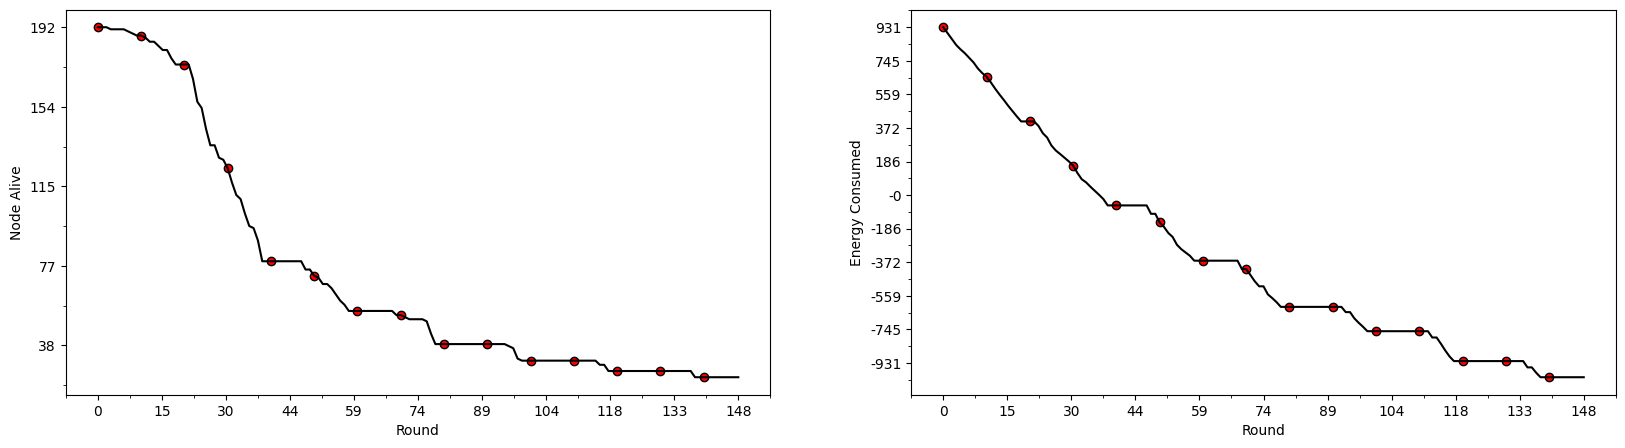

In [9]:
LEACH = networkEnvironment(node_LEACH, "LEACH")
LEACH_aliveNode, LEACH_EnergyNode = LEACH.startSimulation(150)

In [ ]:
DECKS = networkEnvironment(node_DECKS, "DECKS")
DECKS_aliveNode, DECKS_EnergyNode = DECKS.startSimulation(150)

====================================== Round : 1 ======================================
Idle Node : 0
Setup phase energy initial : 1035
Setup phase energy after : 1034.9803489811152
Contention phase energy initial : 1034.98
Transmission energy begin : 1002.66
Node Alive : 207 | CH : 2
====================================== Round : 2 ======================================
Idle Node : 0
Setup phase energy initial : 1002.5704247501124
Setup phase energy after : 1002.5507737312317
Contention phase energy initial : 1002.55
Transmission energy begin : 970.23
Node Alive : 207 | CH : 2
====================================== Round : 3 ======================================
Idle Node : 0
Setup phase energy initial : 970.1408495002245
Setup phase energy after : 970.1270028008673
Contention phase energy initial : 970.13
Transmission energy begin : 936.08
Node Alive : 207 | CH : 2
====================================== Round : 4 ======================================
Idle Node : 0
Setup phase energ

: 

====================================== Round : 1 ======================================
K-opt : 2
Idle Node : 0
Setup phase energy initial : 1015
Setup phase energy after : 1014.8402536904703
Contention phase energy initial : 1014.84
Transmission energy begin : 993.29
Node Alive : 203 | CH : 2
====================================== Round : 2 ======================================
K-opt : 2
Idle Node : 0
Setup phase energy initial : 991.9520594606347
Setup phase energy after : 991.792313151109
Contention phase energy initial : 991.79
Transmission energy begin : 970.24
Node Alive : 203 | CH : 2
====================================== Round : 3 ======================================
K-opt : 2
Idle Node : 0
Setup phase energy initial : 968.904118921268
Setup phase energy after : 968.7443726117434
Contention phase energy initial : 968.74
Transmission energy begin : 947.19
Node Alive : 203 | CH : 2
====================================== Round : 4 ======================================
K-opt :

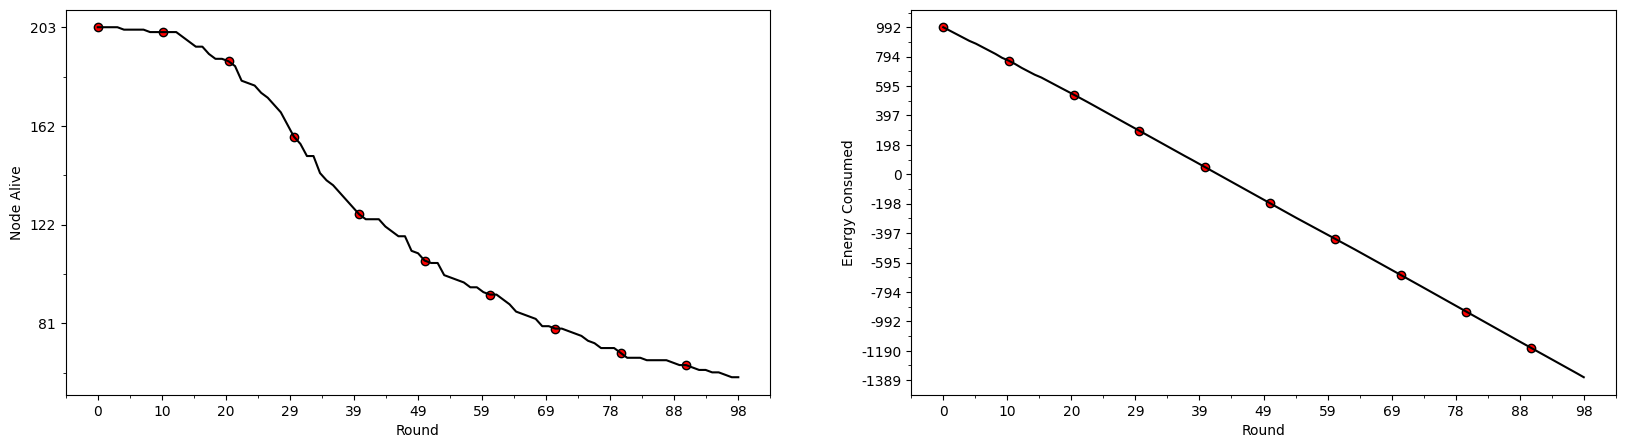

In [ ]:
K_Means = networkEnvironment(node_K_Means, "K-Means")
K_Means_aliveNode, K_Means_EnergyNode = K_Means.startSimulation(100)

In [ ]:
Q_learning = networkEnvironment(node_proposed, "Q-Learning")
Q_learning_aliveNode, Q_learning_EnergyNode = Q_learning.startSimulation(100)

====================================== Round : 1 ======================================
Idle Node : 0
Setup phase energy initial : 960
Setup phase energy after : 959.9428598986697
Contention phase energy initial : 959.94
Transmission energy begin : 933.05
Start state : 1
[1, 0]
ID ; [70, 0] | path : [1, 0]
Start state : 2
[2, 0]
ID ; [97, 0] | path : [2, 0]
Start state : 3
[3, 0]
ID ; [121, 0] | path : [3, 0]
Node Alive : 192 | CH : 3
====================================== Round : 2 ======================================
Idle Node : 0
Setup phase energy initial : 932.7925357990916
Setup phase energy after : 932.7103534727307
Contention phase energy initial : 932.71
Transmission energy begin : 906.63
Start state : 1
[1, 0]
ID ; [70, 0] | path : [1, 0]
Start state : 2
[2, 4, 0]
ID ; [90, 121, 0] | path : [2, 4, 0]
Start state : 3
[3, 0]
ID ; [97, 0] | path : [3, 0]
Start state : 4
[4, 2, 0]
ID ; [121, 90, 0] | path : [4, 2, 0]
Node Alive : 192 | CH : 4
===================================

C:\Users\basee\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:140: RuntimeWarning: divide by zero encountered in double_scalars


[1, 0]
ID ; [8, 0] | path : [1, 0]
Start state : 2
[2, 0]
ID ; [121, 0] | path : [2, 0]
Node Alive : 191 | CH : 2
====================================== Round : 5 ======================================
Idle Node : 0
Setup phase energy initial : 841.038565630126
Setup phase energy after : 840.0871399180755
Contention phase energy initial : 840.09
Transmission energy begin : 781.20
Start state : 1
[1, 0]
ID ; [8, 0] | path : [1, 0]
Start state : 2
[2, 0]
ID ; [79, 0] | path : [2, 0]
Node Alive : 190 | CH : 2
====================================== Round : 6 ======================================
Idle Node : 0
Setup phase energy initial : 772.2483294867454
Setup phase energy after : 771.4898192726824
Contention phase energy initial : 771.49
Transmission energy begin : 711.81
Start state : 1
[1, 2, 0]
ID ; [8, 10, 0] | path : [1, 2, 0]
Start state : 2
[2, 0]
ID ; [10, 0] | path : [2, 0]
Node Alive : 190 | CH : 2
====================================== Round : 7 ==============================

: 

ValueError: x and y must have same first dimension, but have shapes (149,) and (99,)

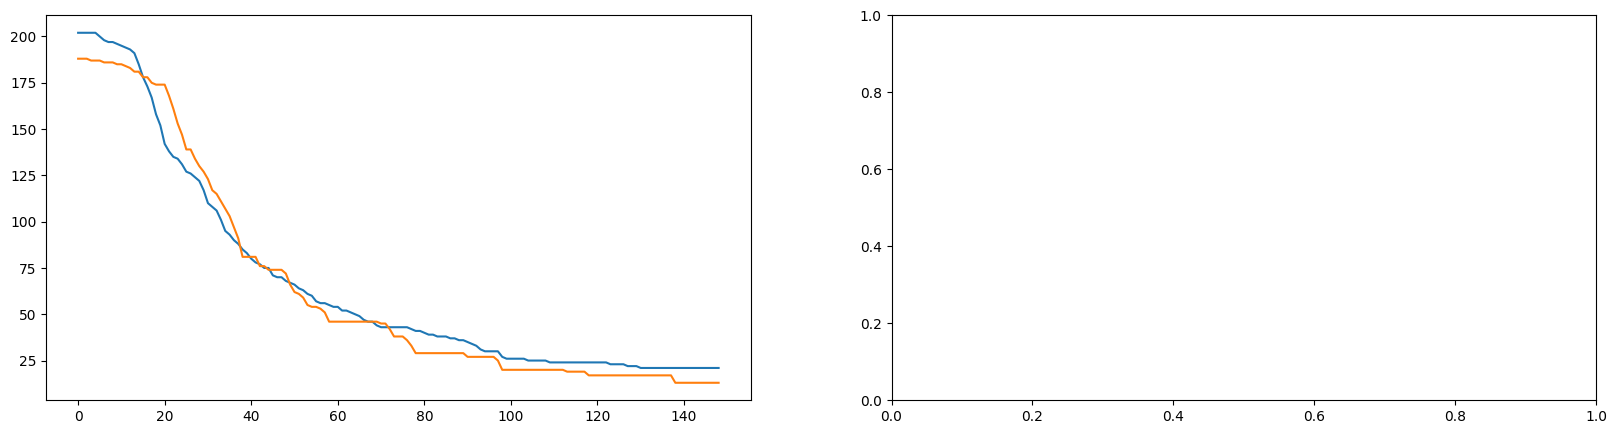

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(20, 5))

rounds = [i for i in range(len(DECKS_aliveNode))]
# ax[0].scatter(rounds, DECKS_aliveNode, label="DECKS")
# ax[0].scatter(rounds, LEACH_aliveNode, label="LEACH")
# ax[0].scatter(rounds, K_Means_aliveNode, label="K-Means")
ax[0].plot(rounds, DECKS_aliveNode, label="DECKS")
ax[0].plot(rounds, LEACH_aliveNode, label="LEACH")
ax[0].plot(rounds, K_Means_aliveNode, label="K-Means")
ax[0].plot(rounds, Q_learning_aliveNode, label="Q-Learning")

# ax[1].scatter(rounds, DECKS_EnergyNode, label="DECKS")
# ax[1].scatter(rounds, LEACH_EnergyNode, label="LEACH")
# ax[1].scatter(rounds, K_Means_EnergyNode, label="K-Means")

ax[1].plot(rounds, DECKS_EnergyNode, label="DECKS")
ax[1].plot(rounds, LEACH_EnergyNode, label="LEACH")
ax[1].plot(rounds, K_Means_EnergyNode, label="K-Means")
ax[1].plot(rounds, Q_learning_EnergyNode, label="Q-Learning")

ax[0].set_ylabel("Node Alive")
ax[0].set_xlabel("Rounds")
ax[1].set_ylabel("Energy Residual")
ax[1].set_xlabel("Rounds")

ax[0].set_xlim(0, 200)
ax[1].set_ylim(ymin=0)
ax[0].legend()
ax[1].legend()

<h3>
    <b>REFERENCES</b>
</h3>

<ol>
    <li>Omeke, Kenechi G., et al. "DEKCS: A dynamic clustering protocol to prolong underwater sensor networks." IEEE Sensors Journal 21.7 (2021): 9457-9464.</li>
    <li>Lazarou, Georgios Y., Jing Li, and Joseph Picone. "A cluster-based power-efficient MAC scheme for event-driven sensing applications." Ad Hoc Networks 5.7 (2007): 1017-1030.</li>
    <li>Heinzelman, Wendi B., Anantha P. Chandrakasan, and Hari Balakrishnan. "An application-specific protocol architecture for wireless microsensor networks." IEEE Transactions on wireless communications 1.4 (2002): 660-670.</li>
</ol>